$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

## Overview

The goal of this assignment is to learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create one new version of that class, apply it to a data set, and discuss the results.

## Required Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.488331480564 Scale 0.004096
SCG: Iteration 20 fValue Eval 0.115274991959 Scale 0.002048
SCG: Iteration 30 fValue Eval 0.0708471266962 Scale 2e-06
SCG: Iteration 40 fValue Eval 0.0505029269219 Scale 1.953125e-09
SCG: Iteration 50 fValue Eval 0.0217408488188 Scale 1.9073486328125e-12
SCG: Iteration 60 fValue Eval 0.00612693450988 Scale 3.725290298461914e-15
SCG: Iteration 70 fValue Eval 0.00441962083116 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.00280402948681 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00168148246468 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000920950801646 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0955 seconds. Final error is 0.030347171229720343.

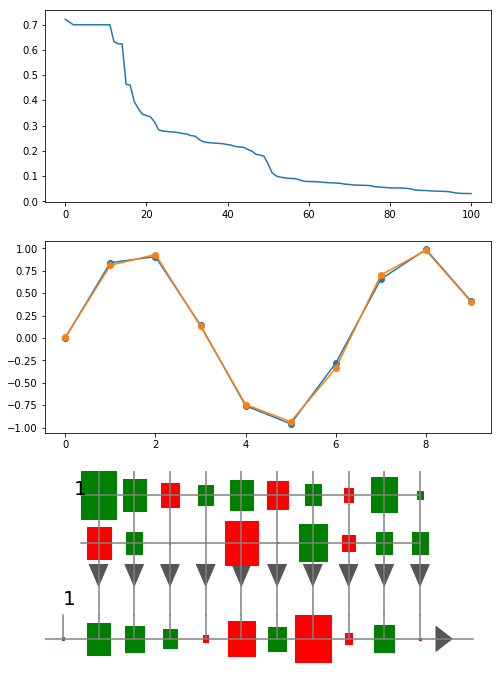

In [11]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now let's extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Copy your file *neuralnetworks.py* into a new file named *neuralnetworksA2.py*.  Modify the code in *neuralnetworksA2.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activationDerivative```.

** Where is the derivative?? **

In [12]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [13]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [14]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [18]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.006893277607 Scale 1.953125e-09
SCG: Iteration 20 fValue Eval 0.00626157786362 Scale 1.9073486328125e-12
SCG: Iteration 30 fValue Eval 0.00211025770951 Scale 1.862645149230957e-15
SCG: Iteration 40 fValue Eval 0.0013879408621 Scale 1e-15
SCG: Iteration 50 fValue Eval 0.00106547792374 Scale 1e-15
SCG: Iteration 60 fValue Eval 0.000658060924518 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.000399095140401 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.000389537615421 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.000360881031641 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000230695928 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0952 seconds. Final error is 0.01518867762512766.

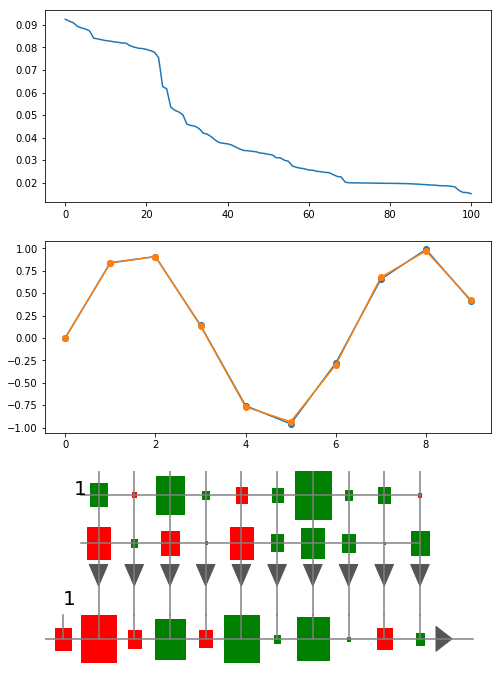

In [19]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

Using your new ```NeuralNetwork``` class, you can compare the error obtained on a given data set by looping over various hidden layer structures.  Here is an example using the simple toy data from above.

In [25]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [26]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [27]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  6.004907e-01  0.862573
1                    [1]  5.004887e-01  0.803123
2                 [1, 1]  5.004854e-01  0.803123
3              [1, 1, 1]  5.004854e-01  0.803123
4           [1, 1, 1, 1]  5.004854e-01  0.803123
5        [1, 1, 1, 1, 1]  5.004854e-01  0.803123
6                    [5]  6.379776e-15  0.437128
7                 [5, 5]  2.166711e-14  0.373791
8              [5, 5, 5]  6.107685e-15  0.320737
9           [5, 5, 5, 5]  2.346147e-15  0.490013
10       [5, 5, 5, 5, 5]  4.659860e-14  0.486663
11                  [10]  1.665016e-15  0.374785
12              [10, 10]  3.9

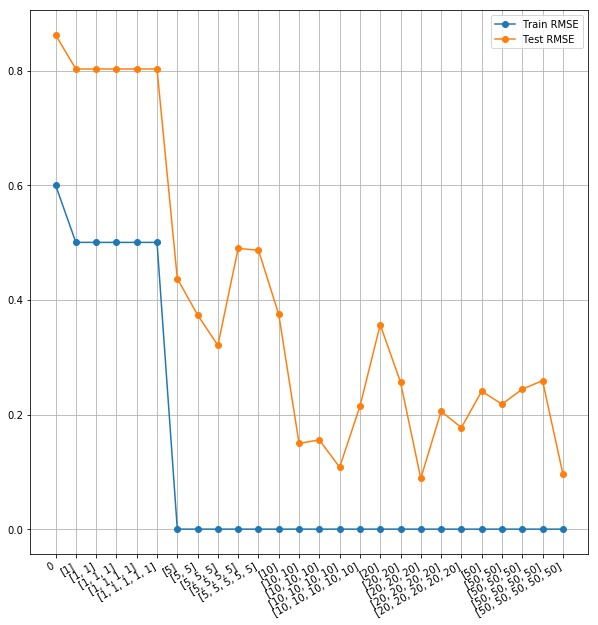

In [30]:
import pandas as pd

errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

If the previous code is run multiple times, it might result in a different hidden layer structure that preforms the best.  The reason for this is because each time you initialize a new Neural Network, the initial values for all `V` and `W` are determined randomly using `np.random.uniform()`.  

For this data (and the random shuffling of the data used when this notebook was run), `[20, 20, 20]` produced the lowest test error, though it can be different if the code was run again.  

Now, using the best hidden layer structure found, I will write the code that varies the number of training iterations. The results will vary here again for the same reason (initialization of nnets). 

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0             1         2
0    10  5.810964e-01  0.839319
1    20  3.123533e-01  0.456702
2    50  2.010400e-01  0.369847
3   100  3.194234e-04  0.386683
4   150  6.930771e-08  0.204136
5   200  1.205949e-03  0.274749
6   250  1.497407e-12  0.215217
7   300  1.536648e-15  0.406434
8   350  3.033686e-15  0.084007
9   400  8.375777e-15  0.218092
10  450  3.650439e-15  0.350250
11  500  5.997822e-15  0.264775


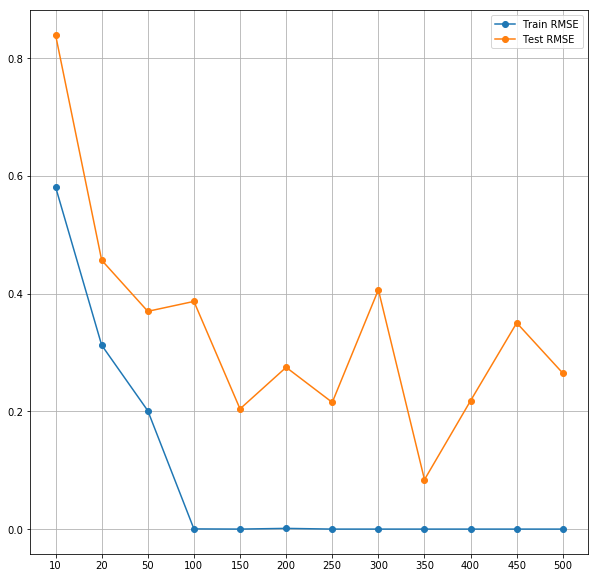

In [31]:
#  ...  insert code here using the code in the previous code block as a guide ...

errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for nit in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], [20,20,20], Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, nit)
    errors.append([nit, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)

After testing all the number of iterations, the best number was 350.  However, when I ran the code multiple times, I found the best number to be different almost every time.  The value was usually between 150 and 350 so I would choose 350 because the nnet is likely better after more training iterations.  

### Experiments wtih Automobile Data

Now, repeat the above steps with the automobile mpg data we have used before.  Set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

Include the code, output, and graphs like the above examples. Discuss the results.  Investigate and discuss how much the best hidden layer structure and number of training iterations vary when you repeat the runs.

The following cells to load in the auto data were taken from lecture notes 03 Linear Regression.  

In [32]:
!curl -O http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
!curl -O http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0      0      0 --:--:-- --:--:-- --:--:--     0     0  20956      0  0:00:01 --:--:--  0:00:01 22697   172k      0 --:--:-- --:--:-- --:--:--  181k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1660  100  1660    0     0  15106      0 --:--:-- --:--:-- --:--:-- 15514


In [33]:
!head -5 auto-mpg.data # Look at first 5 rows to make sure it is what it should be

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"


In [34]:
def missingIsNan(s):
    return np.nan if s == b'?' else float(s)

In [35]:
data = np.loadtxt('auto-mpg.data', usecols=range(8), converters={3: missingIsNan})
data.shape

(398, 8)

In [36]:
nans = np.isnan(data)
goodRowsMask = np.logical_not(nans.any(axis=1))
dataNew = data[goodRowsMask,:]
dataNew.shape

(392, 8)

In [37]:
names =  ['mpg','cylinders','displacement','horsepower','weight',
          'acceleration','year','origin']

Some exploratory plots to visualize the behavior of each variable

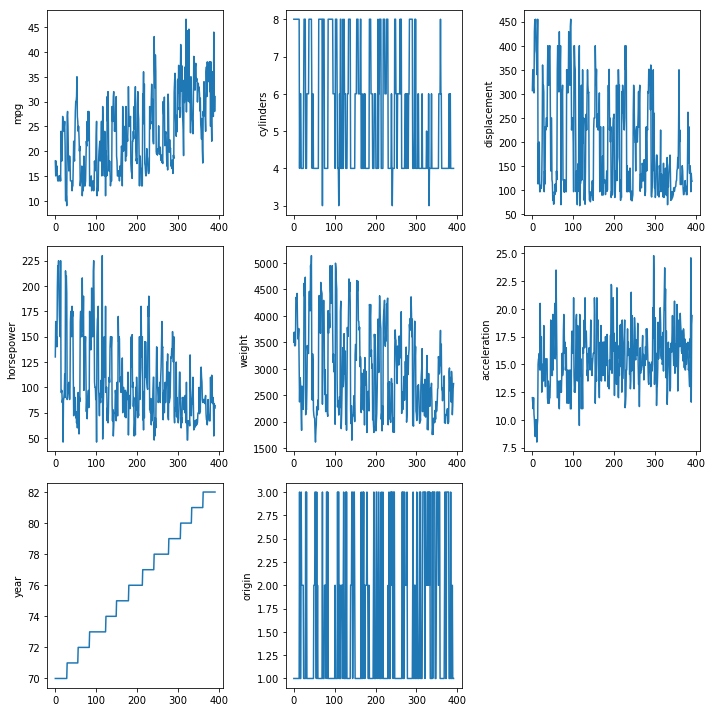

In [38]:
plt.figure(figsize=(10, 10))
nrow, ncol = dataNew.shape
for c in range(ncol):
    plt.subplot(3, 3, c+1)
    plt.plot(dataNew[:, c])
    plt.ylabel(names[c])
plt.tight_layout()

Slice data into target and input variables

In [39]:
# mpg & horsepower
T = dataNew[:, [0,3]]
Tnames = ['mpg','horsepower']
# cylinders, displacement, weight, acceleration, year, and origin
X = dataNew[:, [1,2,4,5,6,7]]
Xnames = ['cylinders','displacement','weight','acceleration','year','origin']
T.shape, X.shape

((392, 2), (392, 6))

Slice T and X into random train and test sets

In [40]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((313, 6), (313, 2), (79, 6), (79, 2))

Try a bunch of different hidden layer structures to see which one preforms the best.  I used code from the previous hidden layer loop. 

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   9.066976   8.529542
1                    [1]  11.267086  11.157327
2                 [1, 1]  11.281531  11.187445
3              [1, 1, 1]  11.296685  11.188886
4           [1, 1, 1, 1]  11.302559  11.198441
5        [1, 1, 1, 1, 1]  19.684041  20.200224
6                    [5]   7.401541   7.669096
7                 [5, 5]   6.354425   7.182756
8              [5, 5, 5]   6.363803   6.889392
9           [5, 5, 5, 5]   5.575583   7.143700
10       [5, 5, 5, 5, 5]   6.136445   7.806691
11                  [10]   6.275720   7.317018
12              [10, 10]   4.262439   7.604682
13      

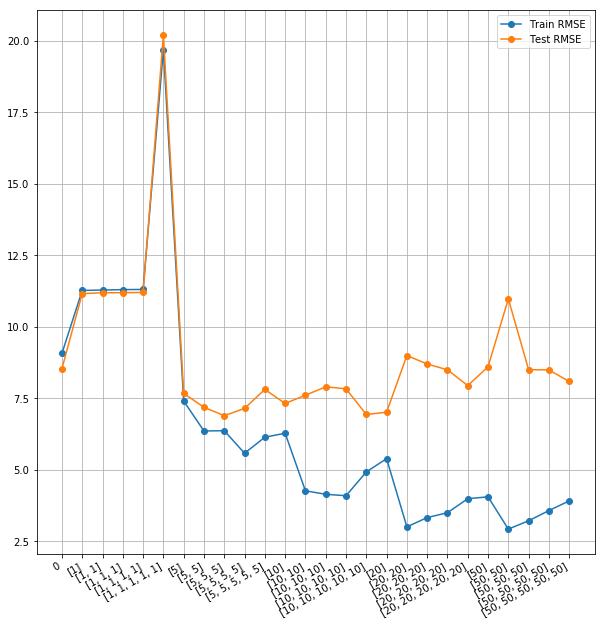

In [41]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

After running the above cell multiple times, the best hidden layer structure was typically `[5,5,5]`, `[10,10,10,10]`, or `[10,10,10,10,10]`.  Any of these hidden layer structures are likely acceptable to use since they preform well each time.  In the last run, `[5, 5, 5]` worked best for the test sets with a test RMSE of 6.889392.  I will use this hidden layer structure to test different number of iterations.

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0          1          2
0    10  13.622304  14.747498
1    20   9.632636   8.620417
2    50   7.938357   6.922754
3   100   7.231260   7.143841
4   150   6.997156   6.627257
5   200   6.745472   6.521408
6   250   6.683843   7.337216
7   300   6.415737   6.646518
8   350   6.133221   6.519364
9   400   6.044534   7.045448
10  450   6.792383   6.860785
11  500   5.873837   6.443515


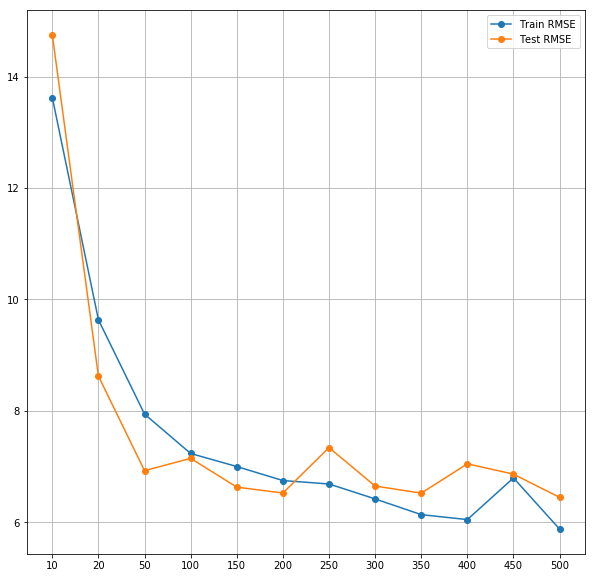

In [45]:
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for nit in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], [5,5,5], Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, nit)
    errors.append([nit, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList)
plt.grid(True)

A neural network with a hidden layer structure of [5,5,5] that was trained 350 times produced an rmse of 6.519364 which was the lowest rmse observed for this specific run.  This rmse was also among some of the lowest I observed from running the code multiple times.  I found that values between 150-350 typically produced the lowest rmse.  I will use the smaller number of training iterations so that it wont take as long to train the nnet. I will use 150 and [5,5,5] to make a new nn and play around with it.

In [46]:
nnetBest = nn2.NeuralNetwork(Xtrain.shape[1], [10,10,10], Ttrain.shape[1])
nnetBest.train(Xtrain, Ttrain, 150)
predicted = nnetBest.use(Xtest)
predictedRMSE = rmse(Ttest, predicted)

I modified this plot function from the code in my A1 to plot the Target vs Predicted values so that I can see how accurate the nnet is.  

In [47]:
def plotTvP2(predicted, T, name = ['mpg', 'horsepower'], rmseText = True):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
    
    ax1.scatter(T[:, 0], predicted[:, 0], edgecolors=(0, 0, 0))
    ax1.plot([T[:, 0].min(), T[:, 0].max()], [T[:, 0].min(), T[:, 0].max()], 'r--', lw=2)
    ax1.set_xlabel('Target')
    ax1.set_ylabel('Predicted')
    ax1.set_title('Target vs. Predicted: ' + name[0])
    if rmseText:
        rmseStr = 'RMSE: ' + str(round(rmse(predicted[:, 0], T[:, 0]), 4))
        ax1.text(0.01, 0.95, rmseStr, size='large', color='red', transform=ax1.transAxes)
    
    
    ax2.scatter(T[:, 1], predicted[:, 1], edgecolors=(0, 0, 0))
    ax2.plot([T[:, 1].min(), T[:, 1].max()], [T[:, 1].min(), T[:, 1].max()], 'r--', lw=2)
    ax2.set_xlabel('Target')
    ax2.set_ylabel('Predicted')
    ax2.set_title('Target vs. Predicted: ' + name[1])
    if rmseText:
        rmseStr = 'RMSE: ' + str(round(rmse(predicted[:, 1], T[:, 1]), 4))
        ax2.text(0.01, 0.95, rmseStr, size='large', color='red', transform=ax2.transAxes)
    
    plt.show()

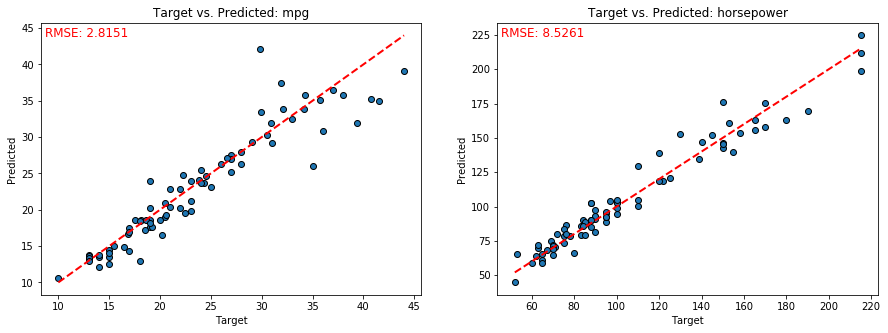

In [48]:
plotTvP2(predicted, Ttest)

Look at that!  Seems like the nnet produces pretty accurate results.  The closer the points are to the dotted red line indicates a more accurate model.  

I will further visualize the accuracy of the nnet using the helper functions that are included in the Neural Network class.  I used the code from the first example in this assignment.  

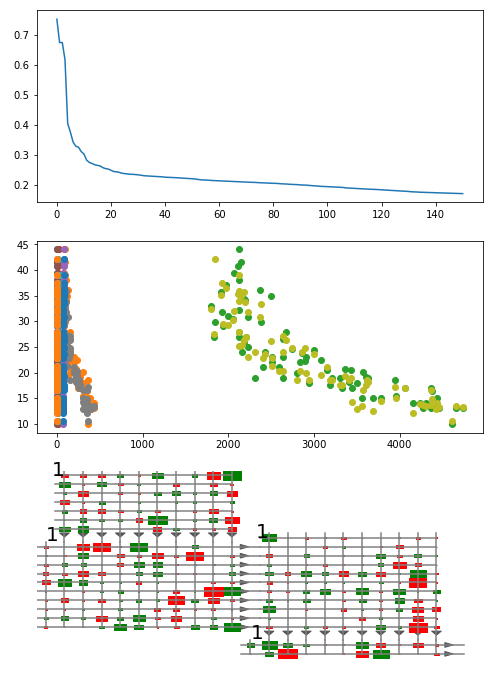

In [49]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnetBest.getErrors())

plt.subplot(3, 1, 2)
plt.plot(Xtest, Ttest[:, 0], 'o', label='Actual')
plt.plot(Xtest, predicted[:, 0], 'o', label='Predicted')

plt.subplot(3, 1, 3)
nnetBest.draw()

The first plot shows the error as the number of iterations increased.  Notice that the error gets smaller as the number of iteration increases.  This is because the weights move toward a more accurate with each iteration.  This is the beauty of error back propagation and gradient decent.  

The third plot shows the weights of each node for the nnet.  A larger square indicates a more influential (larger) weight.  Green is positive and red is negative.

The second plot shows the actual vs predicted values of the data and nnet.  This plot is not very insigntful because there are a lot of input variables.  This causes the plot to get messy but you can still see that the nnet is predicting the actual value pretty closely from the green/yellow dots.  The following cell plots the actual vs predicted value for each input variable paired with both target values.  The points fall pretty closely to each other in all plots which shows that the nnet is working quite well.  

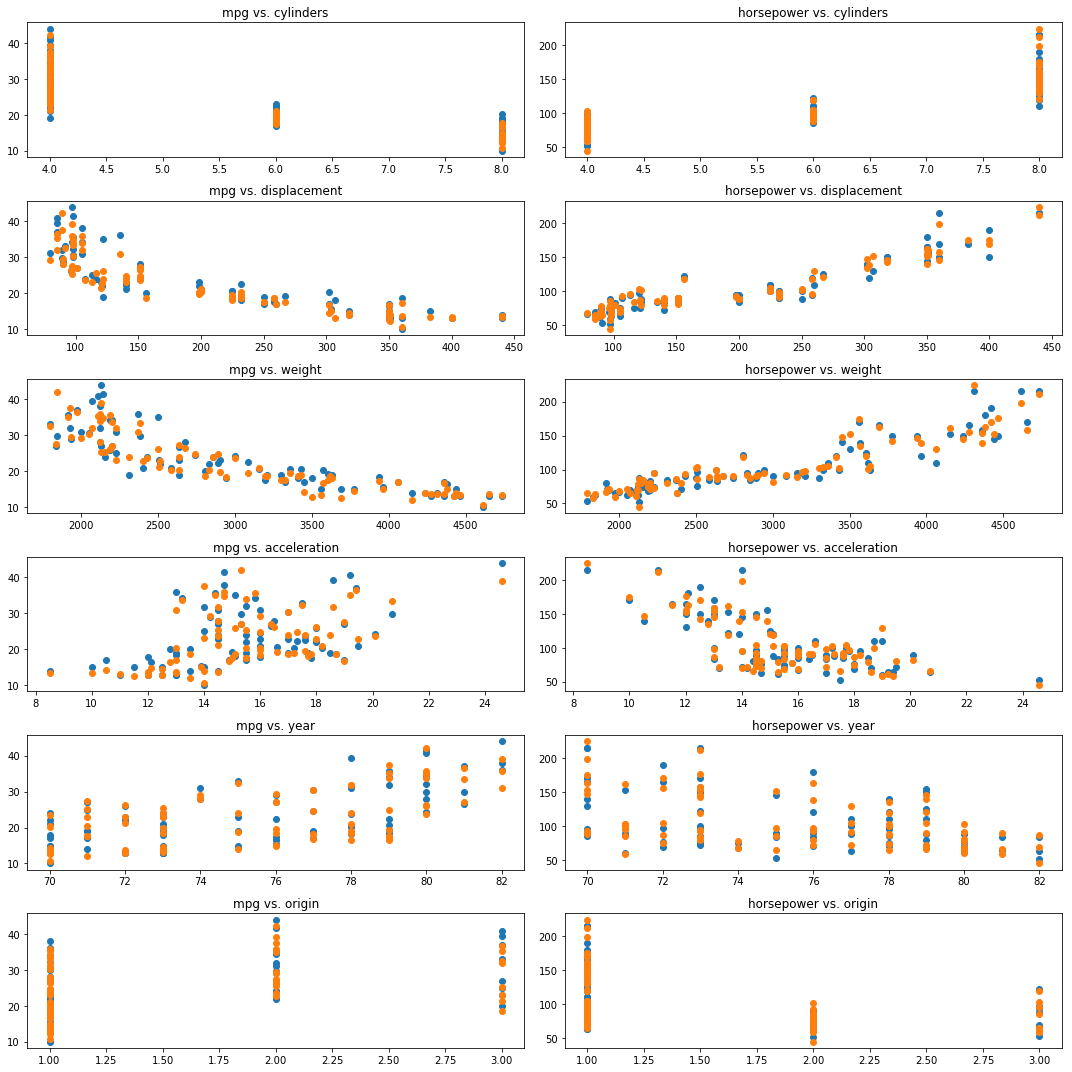

In [50]:
plt.figure(figsize=(15, 15))
subplot_index = 0
for i in range(6):
    subplot_index += 1
    plt.subplot(6, 2, subplot_index)
    plt.plot(Xtest[:, i], Ttest[:, 0], 'o', label='Actual')
    plt.plot(Xtest[:, i], predicted[:, 0], 'o', label='Predicted')
    plt.title("mpg vs. " + Xnames[i])
    
    subplot_index += 1
    plt.subplot(6, 2, subplot_index)
    plt.plot(Xtest[:, i], Ttest[:, 1], 'o', label='Actual')
    plt.plot(Xtest[:, i], predicted[:, 1], 'o', label='Predicted')
    plt.title("horsepower vs. " + Xnames[i])
plt.tight_layout()

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A2.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook and `neuralnetworkA2.py` into one zip file or tar file.  Name your tar file `Lastname-A2.tar` or your zip file `Lastname-A2.zip`.  Check in your tar or zip file using the `Assignment 2` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [51]:
# from A2mysolution import *
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Goodenow-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA2 as nn

--- 10/10 points. The statement  import neuralnetworksA2 as nn  works.

Testing nnet = nn.NeuralNetwork(1, 10, 1)

--- 10/10 points. nnet correctly constructed

Testing a = nnet.activation(-0.8)

--- 10/10 points. activation of -0.664036770267849 is correct.

Testing da = nnet.activationDerivative(-0.664)

--- 10/10 points. activationDerivative of 0.5591039999999999 is correct.

Testing X = np.arange(300).reshape((-1, 3))
        T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
        import neuralnetworksA2 as nn
        nnet = nn.NeuralNetwork(3, [20, 10], 2)
        nnet.train(X, T, 100)
        error = np.sqrt(np.mean((T - nnet.use(X))**2))

--- 20/20 points. The error of 1.4445017944881808 is correct.

A2 Neura

## Extra Credit

Repeat the comparisons of hidden layer structures and numbers of training iterations on a second data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml).